# Die Mathematik des SIDH

Dieses Notebook benötigt das Jupyter-SageMath-9.0-Kernel \
Eine Installationsanleitung finden Sie im Textdokument "Einführung" innerhalb des Projektanhangs

***
$\mathbf{\text{Galois-Feld}}$<br>
***
1.&emsp;Galois-Feld mit Primcharakteristik $$GF(p) = \{\ a\ ; a\ mod\ p\}$$
2.&emsp;Quadratische Erweiterung: $$GF(p^2) = GF(i) = \{\ a*z_2 + b\ ; a,b \in GF(p)\ \}$$
***
$\mathbf{\text{Beispiel}}$<br>
$$GF(7) = \{0, 1, 2, 3, 4, 5, 6 \}$$ </br>
$$GF(p^2) = GF(i) = \{\ a*z_2 + b\ ; a,b \in GF(7)\ \}$$ </br>
$$\vert GF(7) \vert = 7$$ </br>
$$\vert(GF(7^2) \vert = 49$$ </br>

Ein Galoisfeld ist also grundsätzlich die Menge aller Ganzzahlen, die nach modularer Reduktion durch die Primcharakteristik entstehen. Die quadratische Erweiterung besteht aus der Menge aller möglichen Polynome der Grads $2$, mit Koeffizienten aus dem Basisfeld [4]. Im Folgenden ein Beispiel mit $GF(7)$:

In [1]:
galois = GF(7)
quadratic_extension = GF(7^2)
print("Order of GF(p): " + str(galois.order()))
print("Order of GF(p^2): " + str(quadratic_extension.order()))

Order of GF(p): 7
Order of GF(p^2): 49


In [2]:
galois.random_element()

4

In [3]:
quadratic_extension.random_element()

3*z2

***
$\mathbf{\text{Isogenien}}$<br>
***
Eine Isogenie ist eine nicht-konstante rationale Abbildung mit endlichem Kern: $$\phi : E_0 \rightarrow E_1$$
Eine Isogenie ist durch ihren Kern eindeutig identifizierbar: $$ G = \{ P_1 , P_2, ..., P_n\} \in E_0$$ </br> $$G \subset E_0$$ </br> $$\phi(G) = \mathcal{O}$$
***
$\mathbf{\text{Beispiel}}$<br>
$$E_0: y^2 = x^3 + 2x + 3,\ E_0 \subset GF(11)$$

Die Besonderheit einer Isogenie besteht vor allem daraus, dass diese die Gruppenstruktur erhält. Nach Abbildung einer elliptischen Kurve $E_0$ durch die Isogenie $\phi$ auf die Bildkurve $\phi(E_0) = E_1$ besitzt $E_1$ ebenfalls wieder die im Notebook "Grundlagen" besprochene Gruppenstuktur _[3]_. Eine Isogenie ist somit immer ein Gruppenhomomorphismus.
Im Folgenden wird eine Isogenie der Ordnung $8$ konstruiert, womit der Kern dieser Isogenie $8$ Elemente besitzt.

In [4]:
k = GF(11)
E = EllipticCurve(k,[1,2])

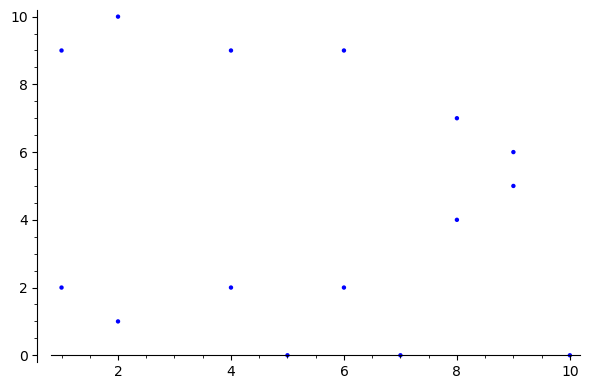

In [5]:
E.plot()

$$P = (4, 2) \in E_0$$ </br>
$$ord(P) = 8$$

In [6]:
P = E(4,2)
P.order()

8

$$G = \{P, ..., \mathcal{O}\}$$ </br> $$\ \vert G \vert = ord(P) = 8$$

In [7]:
kernel = []

for i in range(1, 9):
    kernel.append(P*i)
    
kernel

[(4 : 2 : 1),
 (8 : 4 : 1),
 (2 : 10 : 1),
 (10 : 0 : 1),
 (2 : 1 : 1),
 (8 : 7 : 1),
 (4 : 9 : 1),
 (0 : 1 : 0)]

$$\phi: E_0 \rightarrow E_1 $$ </br>
$$kernel(\phi) = G$$ </br>
$$\vert kernel(\phi) \vert = \vert G \vert = ord(P) = deg(\phi)$$

In [8]:
phi = E.isogeny(kernel)
phi

Isogeny of degree 8 from Elliptic Curve defined by y^2 = x^3 + x + 2 over Finite Field of size 11 to Elliptic Curve defined by y^2 = x^3 + 5*x + 7 over Finite Field of size 11

$$\phi(x, y) = ( \frac{(x^8 - 5x^7 + 2x^6 - 5x^5 + 5x^3 - 5x^2 + 4x + 4)}{(x^7 - 5x^6 + 5x^5 - 2x^4 - 2x^3 + 4x^2 - 3x + 4)}\ ,\ \frac{(x^{11}y + 4x^{10}y + 5x^9y + 5x^8y - 4x^7y - 2x^6y - 2x^5y + 4x^4y - 4x^2y + xy + 3y)}{(x^{11} + 4x^{10} + 2x^9 + x^8 + x^7 - 5x^6 - 3x^5 + 3x^4 - 5x^3 + 2x^2 - 5x - 3)} )$$

In [9]:
phi.rational_maps()

((x^8 - 5*x^7 + 2*x^6 - 5*x^5 + 5*x^3 - 5*x^2 + 4*x + 4)/(x^7 - 5*x^6 + 5*x^5 - 2*x^4 - 2*x^3 + 4*x^2 - 3*x + 4),
 (x^11*y + 4*x^10*y + 5*x^9*y + 5*x^8*y - 4*x^7*y - 2*x^6*y - 2*x^5*y + 4*x^4*y - 4*x^2*y + x*y + 3*y)/(x^11 + 4*x^10 + 2*x^9 + x^8 + x^7 - 5*x^6 - 3*x^5 + 3*x^4 - 5*x^3 + 2*x^2 - 5*x - 3))

$$\phi(G) = \phi(kernel(\phi))= \mathcal{O}$$

In [10]:
for p in kernel:
    print(phi(p))

(0 : 1 : 0)
(0 : 1 : 0)
(0 : 1 : 0)
(0 : 1 : 0)
(0 : 1 : 0)
(0 : 1 : 0)
(0 : 1 : 0)
(0 : 1 : 0)


$$E_1: y^2 = x^3 + 5x + 7$$

In [11]:
E_1 = phi.codomain()
E_1

Elliptic Curve defined by y^2 = x^3 + 5*x + 7 over Finite Field of size 11

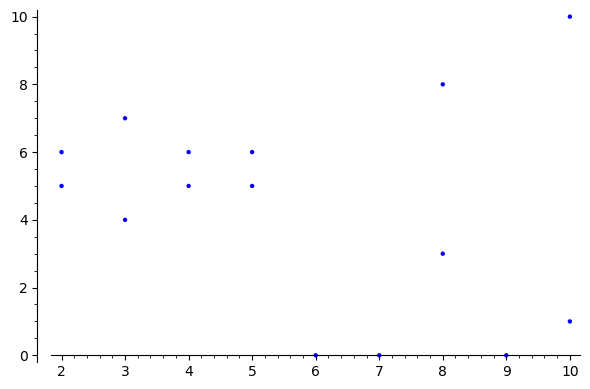

In [12]:
E_1.plot()

***
$\mathbf{\text{Isogenie-Kern Beziehung}}$<br>
***


In [13]:
F = GF(17)
E_0 = EllipticCurve(F, [1, 6])

$\mathbf{\text{Jede n-Torsionsgruppe definiert eine Isogenie vom Grad n}}$

In [14]:
torsion = 2
torsion_group = [point for point in E_0.points() if point.order() == torsion]
torsion_group

[(5 : 0 : 1)]

In [15]:
phi = E_0.isogeny(torsion_group)
phi

Isogeny of degree 2 from Elliptic Curve defined by y^2 = x^3 + x + 6 over Finite Field of size 17 to Elliptic Curve defined by y^2 = x^3 + 12*x + 15 over Finite Field of size 17

$\mathbf{\text{Jede Isogenie vom Grad n definiert eine n-Torsionsgruppe}}$

In [16]:
E_1 = phi.codomain()

In [17]:
for p in E_0.points():
    print("From: " + str(p) + " to " +  str(phi(p)))

From: (0 : 1 : 0) to (0 : 1 : 0)
From: (1 : 5 : 1) to (16 : 11 : 1)
From: (1 : 12 : 1) to (16 : 6 : 1)
From: (2 : 4 : 1) to (5 : 8 : 1)
From: (2 : 13 : 1) to (5 : 9 : 1)
From: (3 : 6 : 1) to (16 : 11 : 1)
From: (3 : 11 : 1) to (16 : 6 : 1)
From: (5 : 0 : 1) to (0 : 1 : 0)
From: (7 : 4 : 1) to (11 : 13 : 1)
From: (7 : 13 : 1) to (11 : 4 : 1)
From: (8 : 4 : 1) to (5 : 8 : 1)
From: (8 : 13 : 1) to (5 : 9 : 1)
From: (9 : 8 : 1) to (11 : 4 : 1)
From: (9 : 9 : 1) to (11 : 13 : 1)
From: (10 : 8 : 1) to (15 : 0 : 1)
From: (10 : 9 : 1) to (15 : 0 : 1)
From: (15 : 8 : 1) to (9 : 6 : 1)
From: (15 : 9 : 1) to (9 : 11 : 1)
From: (16 : 2 : 1) to (9 : 11 : 1)
From: (16 : 15 : 1) to (9 : 6 : 1)


***
$\mathbf{\text{Supersinguläre elliptische Kurven}}$<br>
***
1.&emsp;Ordinäre elliptische Kurven: $$tors(p) = \{P_1, ..., \mathcal{O}\}$$
2.&emsp;Supersinguläre elliptische Kurven: $$tors(p) = \{\mathcal{O}\}$$
***

Wie in der Arbeit "QrTOR - Modernes quantenresistentes Onion Routing" erklärt, können für kryptographische Anwendungen ausschließlich supersinguläre elliptische Kurven verwendet werden. Diese haben die Eigenschaft einen ungewöhnlich großen Endomorphismusring zu besitzen, also ungewöhnlich viele gruppenstruktur-erhaltende Abbildungen auf sich selbst. \
Eine eingänglichere Weise der Definition bietet jedoch die obige Formel, wonach eine elliptische Kurve über dem Feld $GF(p)$ supersingulär ist, sofern ihre $p$-Torsionsgruppe trivial ist (also lediglich das Identitäselement enthält).

In [18]:
char = 5
E_ss = EllipticCurve(GF(char), [0,1])
E_ss.is_supersingular()

True

In [19]:
gen = E_ss.gens()[0]
gen

(2 : 3 : 1)

In [20]:
torsion = char
torsion_group = [point for point in E_ss.points() if point.order() == torsion - 1]
torsion_group

[]

In [21]:
E_ord = EllipticCurve(GF(char), [4,1])
E_ord.is_supersingular()

False

In [22]:
gen_ord = E_ord.gens()[0]
gen_ord

(0 : 1 : 1)

In [23]:
torsion_ord = char
torsion_group_ord = [point for point in E_ord.points() if point.order() == torsion_ord - 1]
torsion_group_ord

[(4 : 1 : 1), (4 : 4 : 1)]

## Ein mathematischer Blick auf den SIDH

Im Folgenden wird ein beispielhafter Schlüsselaustausch auf Basis von Isogenieberechnungen durchgeführt.

### Setzen der öffentlichen Parameter

#### Primcharacteristik

In [24]:
lA = 2 ** 8
lB = 3 ** 5
p = lA*lB - 1
p.is_prime()

True

#### Definitionsfeld

In [25]:
_.<I> = GF(p)[]
K.<i> = GF(p^2, modulus=I^2+1)

#### Elliptische Kurve

In [26]:
E = EllipticCurve(K, [1, 0])
E.is_supersingular()

True

#### Torsions/Isogenie Generatoren

In [27]:
P_a = E(48314*i + 14762 , 46157*i + 12824 , 1)
Q_a = E(2043*i + 16611 , 44347*i + 58767 , 1)
P_b = E(10750*i + 15084 , 21370*i + 13539 , 1)
Q_b = E(60522*i + 47624 , 56832*i + 45130 , 1)

print(str(P_a) + " with Order " + str(P_a.order()))
print(str(Q_a) + " with Order " + str(Q_a.order()))
print(str(P_b) + " with Order " + str(P_b.order()))
print(str(Q_b) + " with Order " + str(Q_b.order()))

(48314*i + 14762 : 46157*i + 12824 : 1) with Order 256
(2043*i + 16611 : 44347*i + 58767 : 1) with Order 256
(10750*i + 15084 : 21370*i + 13539 : 1) with Order 243
(60522*i + 47624 : 56832*i + 45130 : 1) with Order 243


### Berechnung der geheimen und der öffentlichen Schlüssel

#### Alice

In [28]:
S_a = randint(0, 2^8-1)
R = P_a + S_a * Q_a
R

(30140*i + 52660 : 48843*i + 60323 : 1)

In [29]:
isogenyA = E.isogeny(R)
print(isogenyA)

Isogeny of degree 256 from Elliptic Curve defined by y^2 = x^3 + x over Finite Field in i of size 62207^2 to Elliptic Curve defined by y^2 = x^3 + (36605*i+31278)*x + (3952*i+1907) over Finite Field in i of size 62207^2


In [30]:
E_a = isogenyA.codomain()

print(E_a.is_supersingular())
E_a

True


Elliptic Curve defined by y^2 = x^3 + (36605*i+31278)*x + (3952*i+1907) over Finite Field in i of size 62207^2

In [31]:
E_a, phi_Pb, phi_Qb = E_a, isogenyA(P_b), isogenyA(Q_b)
E_a, phi_Pb, phi_Qb

(Elliptic Curve defined by y^2 = x^3 + (36605*i+31278)*x + (3952*i+1907) over Finite Field in i of size 62207^2,
 (60911*i + 51118 : 7766*i + 10434 : 1),
 (25099*i + 43799 : 45246*i + 30237 : 1))

***

#### Bob

In [32]:
S_b = randint(0, 3^5-1)
R = P_b + S_b * Q_b
R

(59196*i + 14747 : 28849*i + 52231 : 1)

In [33]:
isogenyB = E.isogeny(R)
isogenyB

Isogeny of degree 243 from Elliptic Curve defined by y^2 = x^3 + x over Finite Field in i of size 62207^2 to Elliptic Curve defined by y^2 = x^3 + (49450*i+16753)*x + (43821*i+15786) over Finite Field in i of size 62207^2

In [34]:
E_b = isogenyB.codomain()

print(E_b.is_supersingular())
E_b

True


Elliptic Curve defined by y^2 = x^3 + (49450*i+16753)*x + (43821*i+15786) over Finite Field in i of size 62207^2

In [35]:
E_b, psi_Pa, psi_Qa = E_b, isogenyB(P_a), isogenyB(Q_a)
E_b, psi_Pa, psi_Qa

(Elliptic Curve defined by y^2 = x^3 + (49450*i+16753)*x + (43821*i+15786) over Finite Field in i of size 62207^2,
 (44905*i + 14667 : 22763*i + 44548 : 1),
 (2718*i + 32258 : 54815*i + 30726 : 1))

### Berechnung des gemeinsamen Geheimnis

In [36]:
E_b.isogeny(psi_Pa + S_a*psi_Qa).codomain().j_invariant()

4285*i + 17425

****

In [37]:
E_a.isogeny(phi_Pb + S_b*phi_Qb).codomain().j_invariant()

4285*i + 17425

## Das Problem hinter dem SIDH

Finde einen Algorithmus, der folgendes Problem in subexponentieller Zeit löst </br>
$$algorithm(E_0, E_1, deg(\phi)) = \phi;\ \phi : E_0 \rightarrow E_1$$

In [38]:
E_0 = EllipticCurve([6,7])
E_1 = EllipticCurve([-39,70])

In [39]:
E_1 = EllipticCurve([-39,70])

In [40]:
EllipticCurveIsogeny(E_0, kernel = None, codomain = E_1, degree = 2)

Isogeny of degree 2 from Elliptic Curve defined by y^2 = x^3 + 6*x + 7 over Rational Field to Elliptic Curve defined by y^2 = x^3 - 39*x + 70 over Rational Field

Der schnellste (öffentlich bekannte) Algorithmus zur Berechnung einer Isogenie, bei gegebener Ur- und Bildkurve, benötigt
1. auf einem klassischen Computer: $$O(p^{\frac{1}{4}})$$
2. auf einem Quantencomputer: $$O(p^{\frac{1}{6}})$$

## Ein Kompositionsalgorithmus zur effizienten Berechnung von Isogenien

Ein großes Problem für isogeniebasierte Kryptosysteme geht von der hohen Komplexität der Berechnungen von Isogenien aus. Wie oben besprochen, wird eine Isogenie stets aus der Urbild-Kurve und aus dem Kern der zu berechnenden Isogenie konstruiert. Die Anzahl der Elemente innerhalb des Kerns ist dabei gleich dem Grad der Isogenie. \
Für kryptographische Anwendungen werden Isogenien mit sehr hohen Graden benötigt [3], um Kryptoanalysealgorithmen standzuhalten. Im Notebook "Optimierungen" werden zum Beispiel Isogenien vom Grad $2^{250}$ verwendet. Um eine solche Isogenie zu berechnen benötigt man also die Urbildkurve $E_0$ und die $2^{250}$-Torsionsgruppe dieser Kurve. \
Um letztere zu berechnen könnte man den obigen "Algorithmus" verwenden, der auf alle Punkte der Kurve $E_0$ eine $2^{250}$-Skalarmultiplikation anwendet und prüft, ob das Ergebnis gleich dem Identitätselement ist. Dieser hätte dabei eine Zeitkomplexität von $O(order(E_0))$, wobei zusätzlich bei jeder Iteration die kostspielige $2^{250}$-Skalarmultiplikation berechnet werden muss. Dieser Algorithmus kommt also für einen praktischen Einsatz nicht in Frage. \
Lange Zeit (ca. 1990 - 2011) herrschte ein Mangel an Algorithmen, die dieses Problem effizient lösen. Daher wurden isogeniebasierte Kryptosysteme in dieser Zeit innerhalb der Post-Quanten-Kryptographie vernachlässigt. Erst nach dem Vorschlag eines solchen Algorithmus, mit effizienter Laufzeit konnten praxistaugliche kryptographische Protokolle implementiert werden [2].

Die Kernidee hinter diesem Algorithmus ist dabei folgende:
Eine Isogenie $\phi$ des Grads $l^e$ kann auch als $e$ Isogenien des Grads $l$ ausgedrückt werden. Dann gilt: $$\phi = \underbrace{\phi_0 \oplus \phi_1 \oplus \dots \oplus \phi_{e-1}}_{e-mal}$$
Eine Isogenie mit dieser Eigenschaft wird auch als separable Isogenie bezeichnet.
Der Algorithmus, der sich diese Eigenschaft zunutze macht wir nun im Folgenden besprochen.

Zunächst wird der geheime Generatorpunkt $R$ ausgewählt, der die Ordnung $l^e$ besitzt. Durch diesen Punkt $R$ wird nun mittels der $l^{e-1}$-Skalarmultiplikation der Punkt $R_0 = [l^{e-1}]R$ berechnet. Dieser Punkt $R_0$ hat selbstverständlich die Ordnung $l$. Mithilfe dieses Punktes $R_0$ wird nun die erste Isogenie $\phi_0$ berechnet und der intiale Punkt $R$ wird durch $\phi_0$ auf das Bild $\phi_0(R)$ abgebildet. Dieser Bildpunkt hat nun wiederum die Ordnung $l^{e-1}$. \
Dann kann der Prozess wiederholt werden. Der Bildpunkt $\phi_0(R)$ wird nun durch die $l^{e-2}$ Skalarmultiplikation auf einen Punkt der Ordnung $l$ abgebildet. Dieser wird wieder zur Berechnung einer Isogenie $\phi_1$ verwendet und durch diese abgebildet. Der Prozess wird insgesamt also $e$-mal wiederholt [2]. \
Die bekannten Eigenschaften der Isogenieberechnungen bleiben dabei gleich. Sowohl alle einzelnen als auch die zusammengesetzte Isogenie wird eindeutig durch den Generatorpunkt (bzw. dem von diesem aufgespannten Kern) definiert. \
Dieser Algorithmus besitzt somit eine konstante Zeitkomplexität von $O(e)$.

Nun kann schlussendlich auf dieser Grundlage ein Algorithmus definiert werden, der eine noch deutlich geringere Komplexiät besitzt und daher auch durch den SIDHforJ implementiert wird. \
Erinnern wir uns daran, dass während der ersten Skalarmultiplikation $R_0 = [l^{e-1}]R$ selbstverständlich jedes Zwischenergebnis (jedes Resultat der $k$-Skalarmultilpikation) gespeichert werden kann. Nehmen wir nun an, dass ein solcher Punkt $Q = [l^{d}]R$ gespeichert wurde. Nachdem die Isogenie $\phi$ durch den Punkt $R_0$ berechnet wurde, wird nun nicht der Punkt $R_0$ sondern der Punkt $Q$ durch die Isogenie abgebildet. Mittels des Bilds des Punktes durch die Isogenie $\phi(Q)$ wird nun der nächste Generator $R_1 = [l^{e-d-2}]$ durch den Punkt $Q$ berechnet. Mittels dieser Methode sparen wir uns also in diesem Durchgang $d$ Skalarmulitplikationen auf der ersten Bildkurve. Je höher wir den Parameter $d$ wählen, desto weniger Skalarmultiplikationen müssen wir auf der Bildkurve durchführen. Jedoch wird bei steigenden $d$ die Anzahl der möglichen Punkte $Q$ kleiner, da schließlich gilt:  $Q = [l^{d}]R$ [2].
Es gilt nun, für jede Iteration dieses Algorithmus den "besten" Parameter $d$ zu finden. Dieses Optimierungsproblem kann bei gegebener initialer Kurve und gegebenen Generatorenpunkten bereits gelöst werden, sodass diese "Parameterstrategie" in der Praxis Teil der öffentlichen Parameter wird.

Die im SIDHforJ verwendete Liste **splitA**, bzw. **splitsB** innerhalb der öffentlichen Parameter enthält dabei für jede Iteration des genannten Algorithmus den "besten" Parameter. Die Anzahl der Einträge dieser Liste, die durch die Parameter **maxA**, bzw, **maxB** gespeichert wird, gibt dabei die Anzahl der Iterationen an, die der Algorithmus durchlaufen muss.

# Referenzen
_[1]_ Towards Quantum-Resistant Cryptosystems from Supersingular Elliptic Curve Isogenies; Jao David, De Feo Luca; 2011 PQCrypto 2011\
_[2]_ Public-Key Cryptosystem Based on Isogenies; Rostovtsev Alexander, Stolbunov Anton; 2006 DBLP \
_[3]_ Mathematics of Isogeny Based Cryptography; De Feo Luca; 2017 Université de Versailles\
_[4]_ Understanding Cryptography; Paar Christof, Pelzl Jan; 2010 Springer

***
&copy; 2021, Linus Meierhöfer